In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('datasets_1919_3310_flavors_of_cacao.csv')

In [4]:
#Drop the rows where at least one element is missing.
dataset = dataset.dropna()

In [7]:
#How many tuples are there in the dataset
number_records=len(dataset)

In [16]:
#How many unique company names are there in the dataset
len(set(dataset.iloc[:,0]))

416

In [22]:
#How many reviews are made in 2013 in the dataset
sum(dataset.iloc[:, 3]==2013)

184

In [45]:
#In the BeanType Column, how many missing values are there
sum(dataset.iloc[:,7].str.isspace())

887

(array([  4.,  13.,  32., 140., 259., 644., 602.,  97.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

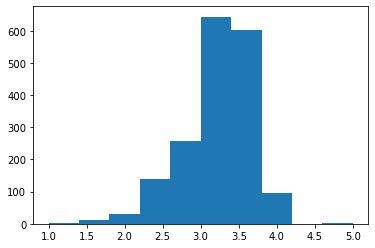

In [48]:
#Visualize the ratings column with a histogram
import matplotlib.pyplot as plt
plt.hist(dataset['Rating'])

In [50]:
#Change the type of values in the column percent from string values to numerical values.
dataset.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [59]:
dataset.iloc[:, 4]=dataset.iloc[:, 4].str.rstrip('%').astype('float')/100

In [60]:
dataset.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                       float64
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

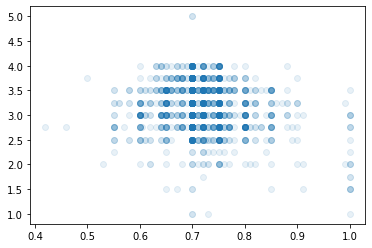

In [64]:
#Plot the converted numerical Cocoa Percent values against the Rating values!
plt.scatter(dataset.iloc[:, 4], dataset['Rating'], alpha=0.1)

In [65]:
#Normalize the Ratings Column and print the results.
import pandas as pd
from sklearn import preprocessing

In [90]:
#extract the values of the Rating column
rating_column = dataset['Rating'].values.astype('float')

In [92]:
rating_column=rating_column.reshape(-1, 1)

In [93]:
rating_column

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [87]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

In [94]:
## Create an object to transform the data to fit minmax processor
rating_column_scaled=min_max_scaler.fit_transform(rating_column)

In [95]:
pd.DataFrame(rating_column_scaled)

,0
0,0.6875
1,0.4375
2,0.5000
3,0.6250
4,0.6250
...,...
1788,0.6875
1789,0.5000
1790,0.6250
1791,0.5625


In [106]:
dataset[dataset.columns[0]]

0       A. Morin
1       A. Morin
2       A. Morin
3       A. Morin
4       A. Morin
          ...   
1790      Zotter
1791      Zotter
1792      Zotter
1793      Zotter
1794      Zotter
Name: Company \n(Maker-if known), Length: 1793, dtype: object

In [109]:
dataset.columns[0]

'Company\xa0\n(Maker-if known)'

In [118]:
#List the companies ordered by their average score (averaged over each company’s reviews).
#pandas.core.groupby.GroupBy.mean
dataset[]dataset.groupby(dataset.columns[0])

SyntaxError: invalid syntax (<ipython-input-118-5c36368a5b9f>, line 3)

In [136]:
#dataset.columns[0] returns the first column name
#dataset.groupby(dataset.columns[0]): returns groupby object that groups by first column
#[dataset.columns[6]]: get the index of groupby object at 7th column (rating)
#.mean(): generate mean value for each group
#.sort_values(ascending=False) decending the column based on mean() value
#dataset.groupby(dataset.columns[0])[dataset.columns[6]].mean() is a series

dataset.groupby(dataset.columns[0])[dataset.columns[6]].mean().sort_values(ascending=False)

Company \n(Maker-if known)
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
                                          ...   
Jacque Torres                           2.000000
Love Bar                                2.000000
Callebaut                               1.875000
Machu Picchu Trading Co.                1.875000
Cote d' Or (Kraft)                      1.000000
Name: Rating, Length: 416, dtype: float64

In [140]:
#Suppose we are interested in the company’s names and locations for some collective analysis. 
#Encode the two categorical columns with the encoder you think is best for the job!
from sklearn.preprocessing import OrdinalEncoder

In [141]:
#initialize Encoder
encoder = OrdinalEncoder()

In [148]:
#combine fit and transform together
dataset[[dataset.columns[0], dataset.columns[5]]]=encoder.fit_transform(dataset[[dataset.columns[0], dataset.columns[5]]])


In [146]:
#view the encoded labels
dataset

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,0.0,Agua Grande,1876,2016,0.63,18.0,3.75,,Sao Tome
1,0.0,Kpime,1676,2015,0.70,18.0,2.75,,Togo
2,0.0,Atsane,1676,2015,0.70,18.0,3.00,,Togo
3,0.0,Akata,1680,2015,0.70,18.0,3.50,,Togo
4,0.0,Quilla,1704,2015,0.70,18.0,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,410.0,Peru,647,2011,0.70,3.0,3.75,,Peru
1791,410.0,Congo,749,2011,0.65,3.0,3.00,Forastero,Congo
1792,410.0,Kerala State,749,2011,0.65,3.0,3.50,Forastero,India
1793,410.0,Kerala State,781,2011,0.62,3.0,3.25,,India
